**<h1 style="text-align: center;">Image Classification  Project</h1>**

## 👋🏼 **Introduction**

<p style="text-align: justify;">I am a data scientist for a company called Secure Cams. And it is building an application in which if you take pictures of gym equipments, it should be able to detect which equipment it is. The problem that currently the company is facing it there are many equipemnts in the gym which people have paid subscription for but they are not using it because they do not know what the equipment is and they do not know how ot use it. So, with this project the aim of my company is to build a deep leaning pipeline and implement this in their gym application. So that an user can take a picture of an equipment and will be able to find out what the equipment is and how to use it.</p>

## 🧿 **Objective**
 <p style="text-align: justify;">Then objective of this project is I will build a module which will try to find chances of an user for getting a hear stroke. For this my company are given me a dataset which has many metrics which has impact on the cause of stroke. So I will be using these features and building an accurate machine learning model. I have specified the steps we will be following in the **Table of content** so that it will be easier to navigate. Firstly I will be going through the full dataset and trying to understand dataset and see if I can see any anomaly or problems in our dataset. Based on that I will be modifying my dataset. And then I will check if our dataset is balanced and if there a requirement to increase the dataset so that our model can learn better from the data. And then I will choose the best performing model to build my final model with best suited parameters.
 
 </p>

**About the data**  
This dataset contains 12 columns. This data set is from Kaggle. You can [**click here**](https://www.kaggle.com/datasets/starsiwach/4-gym-equipment-types-classification-dataset) to view the dataset on kaggle.

## **Table of Content**

##### ⬇ [**Importing Libraries**](#library)
##### 📊 [**Importing Dataset**](#dataset)
##### 🗺️ [**Exploring the dataset**](#exploration)
##### 💭 [**My taughts on the dataset**](#thoughts)
##### ⚙️ [**Pre-processing the data**](#processing)
##### 🔧 [**Feature Engineering**](#feature)
##### 🗂️ [**Selecting the best model for our dataset**](#selection)
##### ✅ [**Assessing which gives us the best results**](#assess)
##### 🎛️ [**Hyper-Parameter Tuning**](#tuning)
##### 🏁 [**Final Model**](#Final)
##### 💡 [**Conclusion**](#conclusion)


## ***Let's begin....***

<a id='library'></a>
## ⬇ <span style="color: #20479b; font-weight: bold;">Importing Libraries</span>

I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [117]:
import  pandas as  pd
import os
import warnings
import    numpy as  np
import cv2
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import tensorflow as tf
import imghdr
warnings.filterwarnings("ignore", category=UserWarning, module="cv2")
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [119]:
dataset_dir = '/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/014. image_classification_project/dataset/Gym Data'
extensions = ['png','jpeg','jpg']

In [120]:
os.listdir(dataset_dir)

['.DS_Store',
 'Recumbent Bike',
 'Home Machine',
 'Dumbells',
 'Elliptical Machine']

In [121]:
os.listdir(os.path.join(dataset_dir,'Recumbent Bike'))[:10]

['th11.jpg',
 'OIP.C2ZbX9ZGlRuIjUbe8fMJewHaHf.jpg',
 'OIP.KzuhaoewQnswx2XCpnYd1QHaHa.jpg',
 '_exercise_bike_nordictrack_commercial_vr21_recumbent_exercise_bike_2000x2000.jpg',
 'OIP.2GjM5otBzxkNdtm7iEmVrwHaGq2.jpg',
 'OIP.1Uim6l2OHqK8y5m0h5jubAHaHa.jpg',
 'OIP.Lv7SbVfUI5J5c2X1YgcN7wHaHa.jpg',
 'Recumbent-Bike-Marcy-NS-40502R-2__09389.1501001516.jpg',
 'OIP.dOGuZHUSrFeuZF28cuZ95gHaHa.jpg',
 'f4f2572d-3c0c-4079-820f-154935f3d66c_1.bfefaacbac800cfae8b76c2fd132d239.jpeg']

In [122]:
print(extensions)
for folder in os.listdir(dataset_dir):
    if folder == '.DS_Store':
        continue
    folder_dir = os.path.join(dataset_dir, folder)
    for file in  os.listdir(folder_dir):
        file_dir = os.path.join(folder_dir, file) 
        try:
            image = cv2.imread(file_dir)
            extension = imghdr.what(file_dir)
            if extension not in extensions:
                print(f'Extension {extension} not supported, hence will be deleted >> {file_dir}')
                os.remove(file_dir)
        except Exception as exp:
            print(f'Extension error for {extension} >> {file_dir}')

['png', 'jpeg', 'jpg']


libpng warning: iCCP: known incorrect sRGB profile


In [123]:
image

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]

In [124]:
image.shape

(156, 156, 3)

In [125]:
type(image)

numpy.ndarray

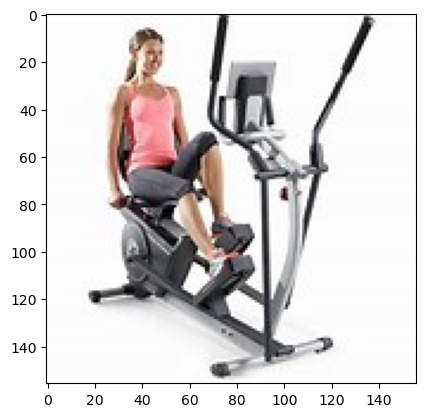

In [126]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [127]:
data = tf.keras.utils.image_dataset_from_directory(dataset_dir)

Found 793 files belonging to 4 classes.


<a id='exploration'></a>
## 🗺️ <span style="color: #20479b; font-weight: bold;">Exploring the dataset</span>

**Note:**
For EDA and Data Pre-processing I will be using the main datafram. Once dataframe is cleaned. I will be splitting it into `train` and  `test` split. Here's why
1. I do not want the just the `test` data to be cleaned and `train` data having unwanted data and error.
2. If I clean only the `test` data then my data is not generalized. Hence while my model tries to predict it will have different issues during training and testing.

After loading the dataset into the DataFrame `dataset`, I will check the `dataset` shape using the `.shape` attribute.

In [131]:
dt_itr = data.as_numpy_iterator()
dt_itr

2024-06-22 01:04:13.918885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [793]
	 [[{{node Placeholder/_4}}]]
2024-06-22 01:04:13.919150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [793]
	 [[{{node Placeholder/_4}}]]


In [132]:
batch = dt_itr.next()
len(batch)

# explain why is it 2

2024-06-22 01:04:15.119743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2

In [133]:
batch[0].shape

# Explay why 4 values and what does 32 mean here
# These are the images

(32, 256, 256, 3)

In [134]:
batch[1]
# This is the lables

array([1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 3, 0, 1, 2, 2, 3, 2, 3, 0, 1,
       1, 1, 3, 1, 2, 1, 0, 0, 1, 1], dtype=int32)

In [135]:
class_names = data.class_names
print(class_names)

['Dumbells', 'Elliptical Machine', 'Home Machine', 'Recumbent Bike']


In [136]:
eq_class= ['Dumbells', 
          'Elliptical Machine', 
          'Home Machine', 
          'Recumbent Bike']

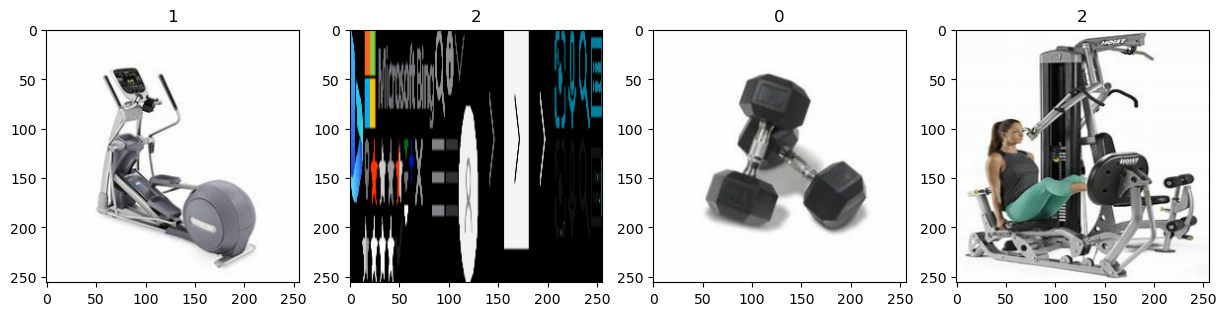

In [137]:
fig, impt = plt.subplots(ncols=4, figsize= (15,15))

for i, img in enumerate(batch[0][2:6]):
    impt[i].imshow(img.astype(int))
    impt[i].title.set_text(batch[1][2:6][i])

Here I have renamed the column for better visiblity and understanding. we can also see a sample of our data. We have columns identity, sex, age, high_blood_pressure, cardiovascular_disease, marrital_status, profession, stay, blood_sugar_level, body_mass_index, tobaco_use and our target label stroke.

In this figure we can see that how this dataset shows us that smoking has mixed effect on having a stroke. There is no specific trend what we see here.

<a id='thoughts'></a>
## 💭 <span style="color: #20479b; font-weight: bold;">My thoughts on the dataset</span>

As per my initial Data Exploration,
- I can see that the dataset big enough to build a ML model.
- This dataset consits of null values in   `body_mass_index` column. Which I can delete it as it negligible rows of data and the body mass index cannot be `null`.
- I will be droping column `identity` as we do not need identity column while building a prediction model as will bring the accuracy down.
- We do have very less data for people who got stroke than in comparison to people to did not. Which makes it little imbalanced, so I will oversample the data.
- columns `body_mass_index`, `sex` and `resident_type` have less impact on the our target label
- Having said that the still have slight impact. Hence I will not delete them.
- Other than that the data looks pretty clean and I may not have to do a lot of data cleaning.
- As I will have to train the model and then later test it, I will be splitting our dataset into two parts. Training and Testing split.


Evaluation Metrics:
For this dataset I will be using, area under the curve, Accuracy, precision, F1 are the evaluation metrics.



Considering all these above points, I will be following the below steps to 

**⚙️ pre-process**
1. ❎ Drop all the rows containing `null` values
2. ❎ Drop columns `identity`
3. ➗ Spliting our main datset into two parts, one part for training and another for testing dataframe
    - Doing it before testing or 
    - to avoid data Scalling and oversampling.

**🔧 feature Engineer**
1. ⚖️ Scalling the numerical and categorical labels

2. 📈 Oversampling the data for stroke = 1, Because of two main reasons.
    - Our focus is on stroke detection and data for people who have stroke is very less.
    - We do not have to worry about data size as well here, since it's not very huge.

<a id='processing' ></a>
## ⚙️ <span style="color: #20479b; font-weight: bold;">Pre-processing the data</span>


**1. ❎ Scaling the data**

In [146]:
scaled_data = data.map(lambda img, label: (img/255, label))

In [147]:
scaled_batch = scaled_data.as_numpy_iterator().next()

2024-06-22 01:04:15.803519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [793]
	 [[{{node Placeholder/_4}}]]
2024-06-22 01:04:15.803739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [793]
	 [[{{node Placeholder/_4}}]]
2024-06-22 01:04:17.047640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [148]:
scaled_batch[0].min()

0.0

In [149]:
scaled_batch[0].max()

1.0

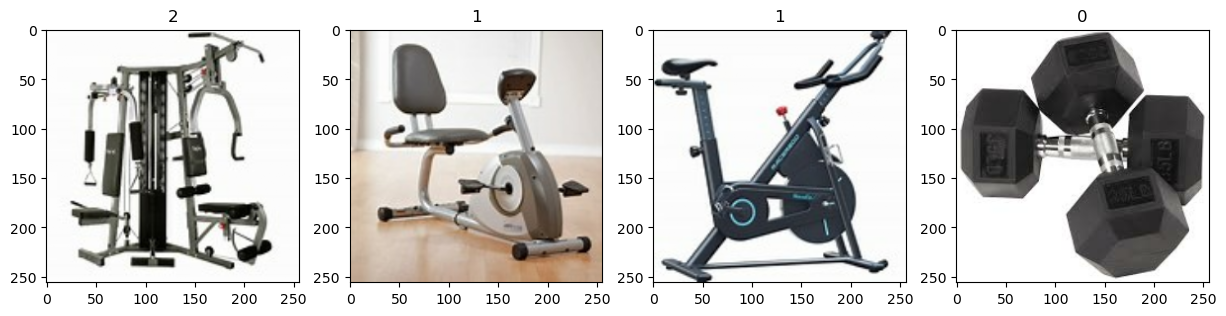

In [150]:
fig, impt = plt.subplots(ncols=4, figsize= (15,15))

for i, img in enumerate(scaled_batch[0][2:6]):
    impt[i].imshow(img)
    impt[i].title.set_text(scaled_batch[1][2:6][i])

**2. ❎ Splitting the data**

In [152]:
len(data)

25

In [153]:
train_batches = 17
validation_batches = 5
test_batches = 3

In [154]:
train_batches_data = scaled_data.take(train_batches)
validation_batches_data = scaled_data.skip(train_batches).take(validation_batches)
test_batches_data = scaled_data.skip(train_batches+validation_batches).take(test_batches)

<a id='feature' ></a>
## 🔧 <span style="color: #20479b; font-weight: bold;">Feature Engineering</span>


<a id='feature' ></a>
## 🔧 <span style="color: #20479b; font-weight: bold;">Deep Leaning Model</span>

**1. ❎ Building a model**

In [219]:
mdl = Sequential([
     tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))
    ,tf.keras.layers.MaxPooling2D()
    ,tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu')
    ,tf.keras.layers.MaxPooling2D()
    ,tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu')
    ,tf.keras.layers.MaxPooling2D()
    ,tf.keras.layers.Flatten()
    ,tf.keras.layers.Dense(256, activation='relu')
    ,tf.keras.layers.Dense(4, activation='softmax')
])

In [221]:
mdl.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [223]:
mdl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [193]:
logdir='logs'

In [225]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [227]:
hist = mdl.fit(train_batches_data, epochs=5, validation_data=validation_batches_data, callbacks=[tensorboard_callback])

Epoch 1/5


2024-06-22 01:50:33.227893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - ETA: 0s - loss: 1.6294 - accuracy: 0.3566

2024-06-22 01:50:49.796518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - 22s 1s/step - loss: 1.6294 - accuracy: 0.3566 - val_loss: 1.2270 - val_accuracy: 0.5125
Epoch 2/5


2024-06-22 01:50:55.080324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - ETA: 0s - loss: 1.0148 - accuracy: 0.6268

2024-06-22 01:51:08.289828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - 18s 988ms/step - loss: 1.0148 - accuracy: 0.6268 - val_loss: 0.7096 - val_accuracy: 0.7500
Epoch 3/5


2024-06-22 01:51:13.445190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - ETA: 0s - loss: 0.5745 - accuracy: 0.7978

2024-06-22 01:51:27.424706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - 19s 1s/step - loss: 0.5745 - accuracy: 0.7978 - val_loss: 0.5581 - val_accuracy: 0.8313
Epoch 4/5


2024-06-22 01:51:32.644230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - ETA: 0s - loss: 0.3629 - accuracy: 0.8824

2024-06-22 01:51:45.700755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - 18s 975ms/step - loss: 0.3629 - accuracy: 0.8824 - val_loss: 0.2569 - val_accuracy: 0.9250
Epoch 5/5


2024-06-22 01:51:50.733867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - ETA: 0s - loss: 0.2233 - accuracy: 0.9320

2024-06-22 01:52:03.642017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/17 [==============================] - 18s 989ms/step - loss: 0.2233 - accuracy: 0.9320 - val_loss: 0.2667 - val_accuracy: 0.9250


<a id='selection'></a>
## 🗂️ <span style="color: #20479b; font-weight: bold;">Selecting the best model for our dataset</span>

So I will be trying 5  models
1. Logistic Regression
4. Xgboost 
3. Random Forest
5. KNearestNeighbour
6. Support Vector 

I am fitting the model for `fet_train_smot` and `tar_train_smot`.
I will then analyze which model gives the best prediction. Then we can tune the models and optimize it even furture.

In [111]:

log_reg = sklearn.linear_model.LogisticRegression(max_iter=1200)
svc = sklearn.svm.SVC(  )
ran_for_cls =  sklearn.ensemble.RandomForestClassifier(  random_state = 1200)
xg_bst = XGBClassifier(  eval_metric = 'error'  )
k_n_n =   sklearn.neighbors.KNeighborsClassifier(    )


log_reg.fit(fet_train_smot,
            tar_train_smot)
svc.fit(fet_train_smot,
            tar_train_smot)
ran_for_cls.fit(fet_train_smot,
            tar_train_smot)
xg_bst.fit(fet_train_smot,
            tar_train_smot)
k_n_n.fit(fet_train_smot.values,
            tar_train_smot.values)

KNeighborsClassifier()

Here I assigned the model to each variable. So that we can later call it. And then I am fitting the models to the features and Target set of target dataframe.

<a id='assess'></a>
## ✅ <span style="color: #20479b; font-weight: bold;">Assessing which gives us the best results</span>

I want to choose the best-performing model. And the margin can be very very small hence I will create a list. And then I will keep appending the value metric list. I will loop through all the models that I have and then I will print the results according to the valuation metrics.

In [117]:
type(fet_test_df)

pandas.core.frame.DataFrame

In [140]:
val_met_list = []


mdl_list = [log_reg,svc,ran_for_cls,xg_bst,k_n_n]

for i, mdl in enumerate(mdl_list):

    if mdl==k_n_n:
        fet_train_smot_val = fet_train_smot.values
        tar_train_smot_val = tar_train_smot.values
        fet_test_df_val    = fet_test_df.values
    else:
        fet_train_smot_val = fet_train_smot
        tar_train_smot_val = tar_train_smot
        fet_test_df_val    = fet_test_df

    tar_pred_df = pd.Series(mdl.predict(
                                fet_test_df_val
                                ))


    val_met_list.append([ 
                        mdl.__class__.__name__,
                        cross_val_score(estimator=mdl, X=fet_train_smot_val, y=tar_train_smot_val, cv=15).mean(), 
                        accuracy_score(tar_test_df, tar_pred_df),
                        roc_auc_score(tar_test_df, tar_pred_df),
                        precision_score(tar_test_df, tar_pred_df),
                        f1_score(tar_test_df, tar_pred_df)
                        ])


val_met_df = pd.DataFrame(val_met_list
                        ,columns=['Model Name','Avg ACC','ACC','AUC','PRE','F1']
                        )
val_met_df = val_met_df.sort_values(
                                    ascending=False, by=['Avg ACC','ACC','AUC']
                                    )
val_met_df

,Model Name,Avg ACC,ACC,AUC,PRE,F1
2,RandomForestClassifier,0.972179,0.928717,0.508307,0.055556,0.054054
3,XGBClassifier,0.960737,0.925662,0.519347,0.073171,0.075949
1,SVC,0.931449,0.916497,0.501951,0.041667,0.046512
4,KNeighborsClassifier,0.929712,0.874745,0.568633,0.087379,0.127660
0,LogisticRegression,0.905089,0.921589,0.580369,0.145455,0.172043


Here we can see that Ran forest performed the best will the avegare acccuracy of 97.21, and AUC of 0.50.
Xgboost is the second best will the avegare acccuracy of 96.07, and AUC of 0.51.


As per our valuation metrics the best model out of them are
1. Random Forest
2. Xgboost

Let us try to tune these two models and try to find we can get the model to perform even better score.

<a id='tuning'></a>
## 🎛️ <span style="color: #20479b; font-weight: bold;">Hyper-Parameter Tuning</span>

I will using gridsearchcv and passing it multiple values so that it can choose a best value for us.

####  <span style=" font-weight: bold;">Random Forest Classifier</span>

In [139]:
params = {'criterion':['gini', 'log_loss'],'n_estimators':[60,80,100,120,140],  'random_state' : [1200,None]}
param_result_list = []
grid_ser_cv = GridSearchCV(ran_for_cls,params,cv=5)
grid_ser_cv.fit(fet_train_smot,tar_train_smot)
df_results = pd.DataFrame(grid_ser_cv.cv_results_)
param_result_list.append([grid_ser_cv.best_score_,grid_ser_cv.best_params_])

param_result_df = pd.DataFrame(param_result_list, columns=['best_score_','best_params_',])
param_result_df

,best_score_,best_params_
0,0.970583,"{'criterion': 'gini', 'n_estimators': 80, 'ran..."


####  <span style=" font-weight: bold;">Support Vector Classifier</span>

In [141]:
params = {'eta':[0.1,0.4,0.2,0.3],'booster':['dart','gblinear', 'gbtree']}
param_result_list = []
grid_ser_cv = GridSearchCV(xg_bst,params,cv=5)
grid_ser_cv.fit(x_train_smot,y_train_smot)
df_results = pd.DataFrame(grid_ser_cv.cv_results_)
param_result_list.append([grid_ser_cv.best_score_,grid_ser_cv.best_params_])

param_result_df = pd.DataFrame(param_result_list, columns=['best_score_','best_params_',])
param_result_df

,best_score_,best_params_
0,0.961667,"{'booster': 'gbtree', 'eta': 0.3}"


When we look at the scores of `random_forect_classifier` and `svm` model, we can come to a conclusion that both are a great model for this dataset.  
Having said that `random_forect_classifier` model perfomed sligtly better. Hence I willl choose that as my final model with `{'criterion': 'gini', 'n_estimators': 80, 'random_state': None}` as the hyperparameters.

<a id='Final'></a>
## 🏁 <span style="color: #20479b; font-weight: bold;">Final Model</span>

In [143]:
final_ran_for_cls =  sklearn.ensemble.RandomForestClassifier(criterion= 'log_loss', n_estimators= 60,  random_state = None)
final_ran_for_cls.fit(fet_train_smot,
            tar_train_smot
            )
y_pred_ran_for_cls = final_ran_for_cls.predict(
                                         fet_test_df
                                         )
print('Random Forest')
print('='*53)
print('AVG ACC }',cross_val_score(estimator=log_reg, X=fet_train_smot, y=tar_train_smot, cv=5).mean())
print('PRE     }',precision_score(tar_test_df, y_pred_ran_for_cls))
print('ACC     }',accuracy_score(tar_test_df, y_pred_ran_for_cls))
print('F1S     }',f1_score(tar_test_df, y_pred_ran_for_cls))
print('AUS     }',roc_auc_score(tar_test_df, y_pred_ran_for_cls))


Random Forest
AVG ACC } 0.9044252374080068
PRE     } 0.05405405405405406
ACC     } 0.9276985743380856
F1S     } 0.05333333333333334
AUS     } 0.5077776538804638


<a id='conclusion'></a>
## 💡 <span style="color: #20479b; font-weight: bold;">Conclusion</span>

To summarize everythin we did
- we started with loading the dataset
- In our eda we noticed that
    - identity column was unnessary.
    - body_mass_index column had null values.
    - dataset was pretty imbalanced.
- cleaned the data, by deleting null rows, dropping identity column, and split the data to avoid data leakage.
- And then we scaled the numerical and categorical values.
- oversampled the data using smote.

I tried 5 different model. Out of which `random forest classifier` and `xgboost` model performed the best.  
I tuned tuned the hyper parameters using `gridsearchCV` and found that amond both the models, `random forest classifier` outperformed `xgboost` slightly.

As per the valuation metrics I  found `random forest classifier` with `{'C': 1.4, 'degree': 4, 'kernel': 'poly'}` parameters provided the best with pretty good acccuracy of 93%.

With this model in place, now my company can use this model to take inputs from the users and prompt them if there are chances of getting a stroke for them. This solves the problem that we stated before. This will significantly help the users in reducing the rist of strokes, and notify them to get medical help as soon as possible.

I felt that if the data has more parametrics we could have improved more. Also `body_mass_index` of a person does impact on the chances of getting an stroke, but in this dataset it did not show the signs of it. Hence it will be better if data collection is done even more accurately to improve the accuracy of the model.

